In [4]:
import json
import pickle

from scipy.sparse import coo_matrix, csr_matrix, lil_matrix, csc_matrix, diags, vstack
from scipy.stats import pearsonr

from matplotlib import pyplot as plt
from IPython.display import HTML, display
import pandas as pd
import numpy as np
import random
from datetime import date
from matplotlib.dates import DateFormatter

In [2]:
with open("stored_variables/comment_polarization_user_sanders.pickle", "rb") as f:
    pi_vals_sanders_comment = pickle.load(f)
    
with open("stored_variables/comment_polarization_user_trump.pickle", "rb") as f:
    pi_vals_trump_comment = pickle.load(f)

In [77]:
with open("stored_variables/subreddit_polarization_user_sanders.pickle", "rb") as f:
    pi_vals_sanders_subreddit = pickle.load(f)
    
with open("stored_variables/subreddit_polarization_user_trump.pickle", "rb") as f:
    pi_vals_trump_subreddit = pickle.load(f)

In [78]:
pi_vals_sanders_comment_overall = np.concatenate(pi_vals_sanders_comment)
pi_vals_trump_comment_overall = np.concatenate(pi_vals_trump_comment)
pi_vals_sanders_subreddit_overall = np.concatenate(pi_vals_sanders_subreddit)
pi_vals_trump_subreddit_overall = np.concatenate(pi_vals_trump_subreddit)

In [79]:
print(len(pi_vals_sanders_comment_overall))
print(len(pi_vals_trump_comment_overall))
print(len(pi_vals_sanders_subreddit_overall))
print(len(pi_vals_trump_subreddit_overall))

22457
9044
22457
9044


In [82]:
all_comments_scores = np.concatenate([pi_vals_sanders_comment_overall,pi_vals_trump_comment_overall])
all_subreddit_scores = np.concatenate([pi_vals_sanders_subreddit_overall,pi_vals_trump_subreddit_overall])

In [81]:
all_comments_scores[all_comments_scores == 0] = 0.5
all_subreddit_scores[all_subreddit_scores == 0] = 0.5

In [89]:
print(len([i for i in range(len(all_comments_scores)) if all_comments_scores[i] > 0 and all_subreddit_scores[i] > 0]))
print(len([i for i in range(len(all_comments_scores)) if all_comments_scores[i] > 0]))


7705
7705


In [83]:
all_nonzero_comment_scores = all_comments_scores[[i for i in range(len(all_comments_scores)) 
                                                 if all_comments_scores[i] > 0 and all_subreddit_scores[i] > 0]] 
all_nonzero_subreddit_scores = all_subreddit_scores[[i for i in range(len(all_comments_scores)) 
                                                 if all_comments_scores[i] > 0 and all_subreddit_scores[i] > 0]]

In [84]:
print(len(all_comments_scores))

31501


In [85]:
print(len(all_nonzero_comment_scores))

7705


In [86]:
pearsonr(all_nonzero_comment_scores, all_nonzero_subreddit_scores)

(0.3019642260307949, 3.558060823840067e-162)

In [87]:
pearsonr(all_comments_scores, all_subreddit_scores)

(0.280233465048473, 0.0)

In [41]:
user_comment_scores = np.concatenate([np.sum(pi_vals_sanders_comment, axis=0), 
                                      np.sum(pi_vals_trump_comment, axis=0)]) / len(pi_vals_sanders_comment)
user_subreddit_scores = np.concatenate([np.sum(pi_vals_sanders_subreddit, axis=0), 
                                      np.sum(pi_vals_trump_subreddit, axis=0)]) / len(pi_vals_sanders_comment)

In [65]:
num_nonzero_sanders_comment = np.sum(np.where(np.array(pi_vals_sanders_comment) > 0, 1, 0), axis = 0)
num_nonzero_trump_comment = np.sum(np.where(np.array(pi_vals_trump_comment) > 0, 1, 0), axis = 0)
num_nonzero_sanders_subreddit = np.sum(np.where(np.array(pi_vals_sanders_subreddit) > 0, 1, 0), axis = 0)
num_nonzero_trump_subreddit = np.sum(np.where(np.array(pi_vals_trump_subreddit) > 0, 1, 0), axis = 0)

In [42]:
pearsonr(user_comment_scores, user_subreddit_scores)

(0.34027441085818555, 1.8755647140015367e-51)

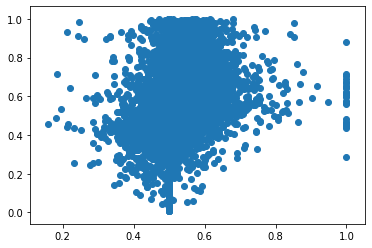

In [39]:
plt.scatter(all_comments_scores, all_subreddit_scores)
plt.show()

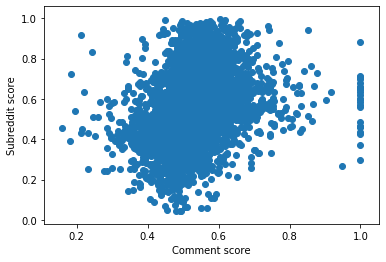

In [88]:
plt.scatter(all_nonzero_comment_scores, all_nonzero_subreddit_scores)
plt.xlabel('Comment score')
plt.ylabel('Subreddit score')
plt.show()

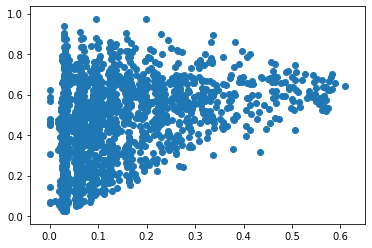

In [43]:
plt.scatter(user_comment_scores, user_subreddit_scores)
plt.show()

In [69]:
valid_indices_user = np.nonzero(np.concatenate([num_nonzero_sanders_comment, num_nonzero_trump_comment]))[0]

In [72]:
user_comment_scores1 = np.concatenate([np.sum(pi_vals_sanders_comment, axis=0), 
                                      np.sum(pi_vals_trump_comment, axis=0)])[valid_indices_user] / np.concatenate(
                                      [num_nonzero_sanders_comment, num_nonzero_trump_comment])[valid_indices_user]
user_subreddit_scores1 = np.concatenate([np.sum(pi_vals_sanders_subreddit, axis=0), 
                                      np.sum(pi_vals_trump_subreddit, axis=0)])[valid_indices_user] / np.concatenate(
                                      [num_nonzero_sanders_subreddit, num_nonzero_trump_subreddit])[valid_indices_user]

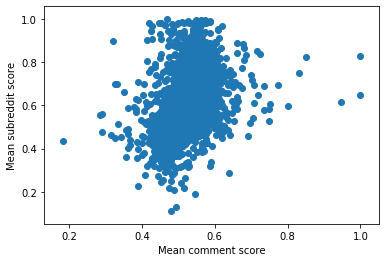

In [76]:
plt.scatter(user_comment_scores1, user_subreddit_scores1)
plt.xlabel('Mean comment score')
plt.ylabel('Mean subreddit score')
plt.show()

In [90]:
print(len(user_comment_scores1))

1842


In [74]:
pearsonr(user_comment_scores1, user_subreddit_scores1)

(0.2983058363878252, 3.591807320266583e-39)